In [1]:
import tensorflow as tf
import keras as K
import pandas as pd
import numpy as np

np.random.seed(2)

/Users/gauriyewale/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/gauriyewale/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
Using TensorFlow backend.


In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
from sklearn.preprocessing import StandardScaler

data['norm_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount', 'Time'], axis = 1)

In [4]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [5]:
#Splitting dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [6]:
X_train.shape

(199364, 29)

In [7]:
y_train.shape

(199364, 1)

In [8]:
#Convert to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep Neural Network

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [10]:
model = Sequential([
    Dense(units =16, input_dim = 29, activation = 'relu'),
    Dense(units =24,activation = 'relu'),
    Dropout(0.5),
    Dense(units =24,activation = 'relu'),
    Dense(units =24,activation = 'relu'),
    Dense(units =1,activation = 'sigmoid')
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 2,113
Trainable params: 2,113
Non-trainable params: 0
____________________________________________________

In [12]:
#Train model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
199364/199364 [==============================] - 15s 75us/step - loss: 0.0096 - accuracy: 0.9979
Epoch 2/5
199364/199364 [==============================] - 14s 72us/step - loss: 0.0039 - accuracy: 0.9993
Epoch 3/5
199364/199364 [==============================] - 14s 71us/step - loss: 0.0035 - accuracy: 0.9994
Epoch 4/5
199364/199364 [==============================] - 13s 67us/step - loss: 0.0036 - accuracy: 0.9994
Epoch 5/5
199364/199364 [==============================] - 13s 67us/step - loss: 0.0034 - accuracy: 0.9994


In [13]:
#Performance metrics

model_score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 1s 12us/step


In [14]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = y_pred.round()
y_actual = pd.DataFrame(y_test)

conf_matrix = confusion_matrix(y_actual, y_pred)
conf_matrix

array([[85274,    22],
       [   31,   116]])

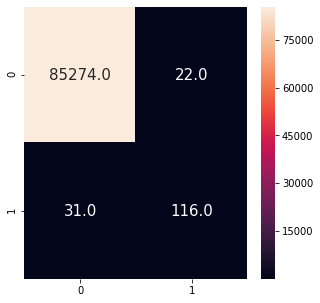

In [16]:
#Plot confusion matrix heatmap
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (5,5))
sn.heatmap(conf_matrix, annot=True, annot_kws={"size": 15}, fmt='.1f')